### 1. Introduction 

### 2. Load Packages

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
#from yellowbrick.cluster import KElbowVisualizer

from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import BaselineOnly, CoClustering
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

import numpy as np 
import pandas as pd

import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

import operator 
import heapq 
#import xgboost as xgb
from surprise import Reader, Dataset
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import GridSearchCV

#other libraries
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from collections import defaultdict
import datetime
import re
from IPython.display import display_html

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install surprise

### Data:

#### Movie Data

In [2]:
movies_df =  pd.read_csv('movies.csv')
imdb_df =  pd.read_csv('imdb_data.csv')
links_df =  pd.read_csv('links.csv')
g_scores =  pd.read_csv('genome_scores.csv')
g_tags =  pd.read_csv('genome_tags.csv')

print(movies_df.shape, imdb_df.shape, links_df.shape, g_scores.shape, g_tags.shape)

(62423, 3) (27278, 6) (62423, 3) (15584448, 3) (1128, 2)


#### Train and Test Data

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head(3)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


### 3. Exploratory Data Analyses

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [6]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [7]:
g_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [8]:
g_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [9]:
train_df.info()
train_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


(10000038, 4)

In [10]:
test_df.info()
test_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


(5000019, 2)

#### Missing values 

In [11]:
print("Movies: ")
print(str(movies_df.isnull().sum()))
# print("============")
# print("Tags: ")
# print(str(tags_df.isnull().sum()))
print("============")
print("Links: ")
print(str(links_df.isnull().sum()))
print("============")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("============")
print("Genome scores: ")
print(str(g_scores.isnull().sum()))
print("============")
print("Genome tags: ")
print(str(g_tags.isnull().sum()))

print("Train: ")
print(str(train_df.isnull().sum()))
print("============")
print("Test: ")
print(str(test_df.isnull().sum()))
print("============")

Movies: 
movieId    0
title      0
genres     0
dtype: int64
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
Genome tags: 
tagId    0
tag      0
dtype: int64
Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Test: 
userId     0
movieId    0
dtype: int64


In [12]:
#extracting released year
movies = movies_df.copy()
movies['release_year']=movies['title'].str[-5:-1] 
#spliting the genres into a list
movies['genres']=movies['genres'].str.split('|') 
#concatinate ratings with movies dataframe
movies.dropna() 
movies.head(3)

,movieId,title,genres,release_year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995


In [13]:
#spliting the title cast into a list
imdb = imdb_df.copy()
imdb['title_cast']=imdb['title_cast'].str.split('|') 
imdb.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry


### Merging the dataset 

In [14]:
train_eda = train_df.copy()
con = pd.concat([train_df[:1000],movies], axis=1)
con.head()

,userId,movieId,rating,timestamp,movieId,title,genres,release_year
0,5163.0,57669.0,4.0,1.518350e+09,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,106343.0,5.0,4.5,1.206239e+09,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,146790.0,5459.0,5.0,1.076216e+09,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,106362.0,32296.0,2.0,1.423043e+09,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995
4,9041.0,366.0,3.0,8.333758e+08,5,Father of the Bride Part II (1995),[Comedy],1995


In [15]:
df= pd.concat([imdb,con], axis=1)
df.dropna(inplace=True)
df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,userId,movieId,rating,timestamp,movieId,title,genres,release_year
0,1.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,5163.0,57669.0,4.0,1.518350e+09,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,106343.0,5.0,4.5,1.206239e+09,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3.0,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,146790.0,5459.0,5.0,1.076216e+09,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,4.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,106362.0,32296.0,2.0,1.423043e+09,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995
4,5.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,9041.0,366.0,3.0,8.333758e+08,5,Father of the Bride Part II (1995),[Comedy],1995


**Movie Ratings from the User**

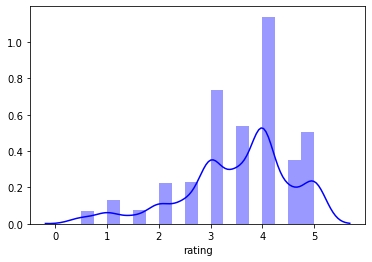

In [16]:
# Distplot of ratings 
sns.distplot(df["rating"], color='blue');

#### Genres

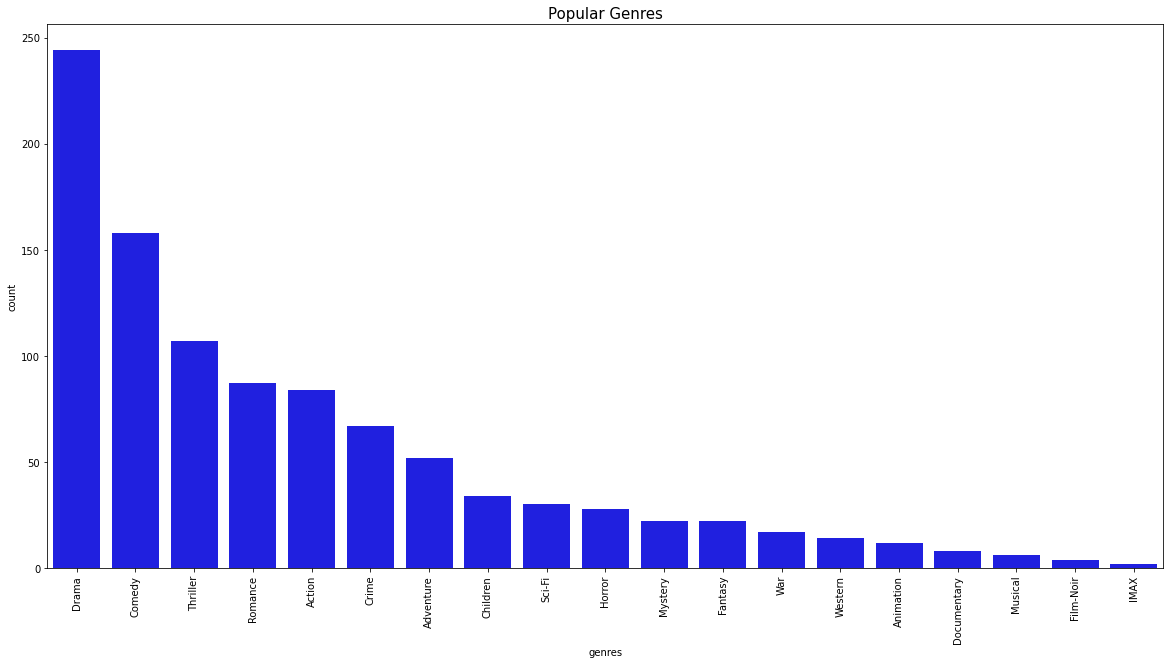

In [17]:
# Ploting top genres in the Dataset
plt.figure(figsize=(20, 10))
gen = df['genres'].explode()
ax=sns.countplot(x=gen, order=gen.value_counts().index[:30],color='blue')
ax.set_title('Popular Genres', fontsize=15)
plt.xticks(rotation =90)
plt.show()

#### Movies made per year 

Text(0.5, 1.0, 'Total Movies Released per Year')

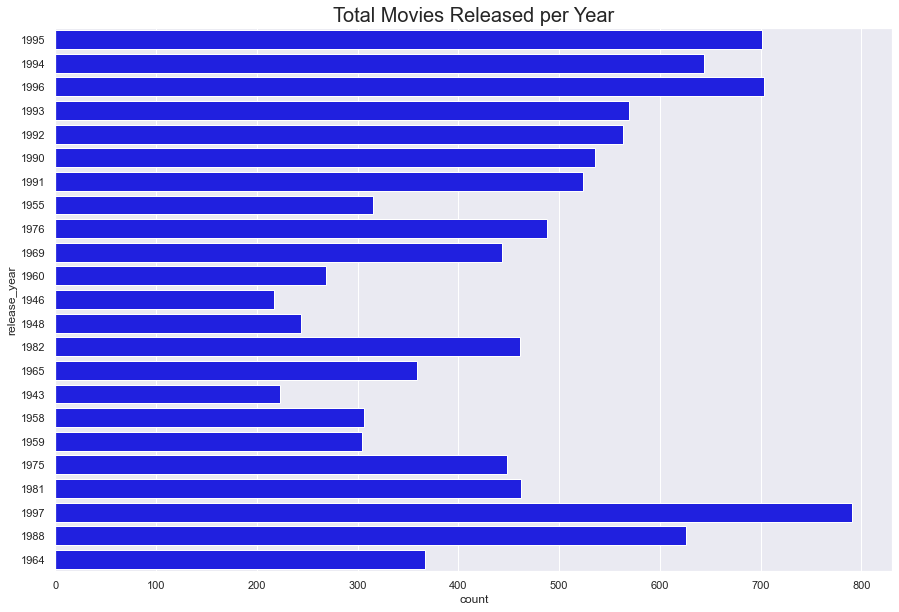

In [18]:
# Plot movies released per year
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=movies['release_year'], data=df, order=df['release_year'].value_counts().index[0:30],color='blue')
ax.set_title('Total Movies Released per Year', fontsize= 20)

#### Popular cast members 

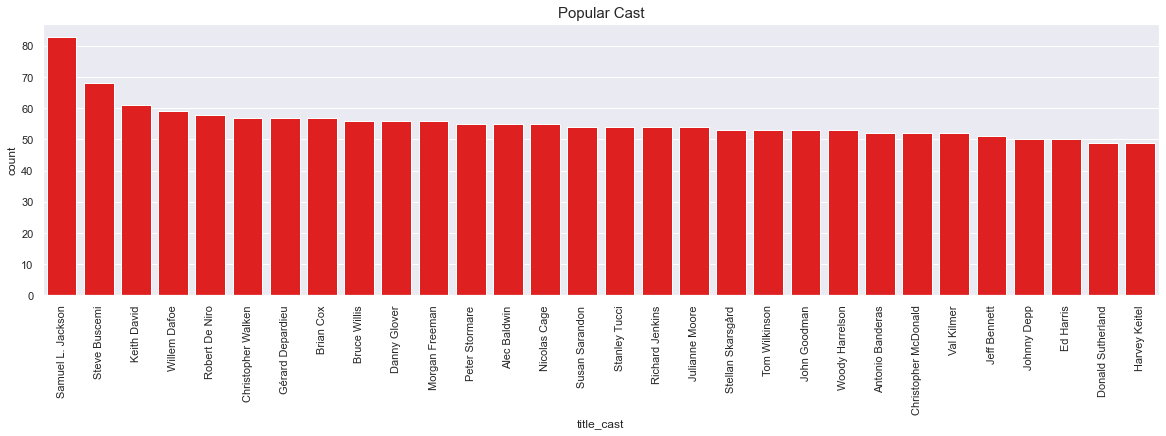

In [19]:
# Plot popular cast
plt.figure(figsize = (20,5))
cast=imdb['title_cast'].explode()
ax=sns.countplot(x=cast, order = cast.value_counts().index[:30],color='red')
ax.set_title('Popular Cast',fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Runtime

In [20]:
# Describe the runtime 
df['runtime'].describe()

count    467.000000
mean     109.119914
std       18.188763
min       76.000000
25%       96.500000
50%      107.000000
75%      117.000000
max      195.000000
Name: runtime, dtype: float64

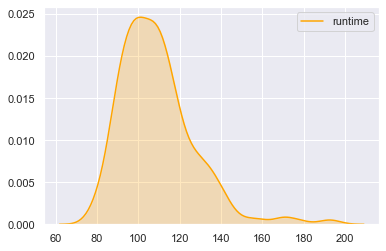

In [21]:
#Plot the Runtime
sns.set(style="darkgrid", )
sns.kdeplot(data=df['runtime'], shade=True, color='orange')

In [22]:
#Show movies with long lengths 
df[df['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,release_year
523,195.0,"Scout, The (1994)",1994
13,192.0,Nixon (1995),1995
379,191.0,Bad Company (1995),1995
108,178.0,Braveheart (1995),1995
15,178.0,Casino (1995),1995
442,171.0,"Favor, The (1994)",1994
243,170.0,Hoop Dreams (1994),1994
657,170.0,Song of the Little Road (Pather Panchali) (1955),1955
5,170.0,Heat (1995),1995
558,160.0,Cronos (1993),1993


In [23]:
# Show movies with short lengths
df[df['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime').head(10)

,runtime,title,release_year
547,76.0,Tombstone (1993),1993
236,78.0,"Goofy Movie, A (1995)",1995
653,79.0,Faithful (1996),1996
553,80.0,"Beans of Egypt, Maine, The (1994)",1994
814,80.0,Ransom (1996),1996
0,81.0,Toy Story (1995),1995
730,81.0,Force of Evil (1948),1948
47,81.0,Pocahontas (1995),1995
570,82.0,Andre (1994),1994
728,83.0,Brothers in Trouble (1995),1995


### 4. Data Processing 

Merging data 

In [24]:
movies1 = movies_df.copy()
metadata =pd.merge(movies1,imdb_df,how = 'left',on = 'movieId')
genome_score_tags = pd.merge(g_scores,g_tags, how='left',on='tagId')

In [25]:
stat_metadata = metadata.copy()
stat_genome_score_tags = genome_score_tags.copy()
stat_metadata = pd.DataFrame(metadata.describe())
stat_genome_score_tags = pd.DataFrame(genome_score_tags.describe())

In [26]:
from IPython.display import display_html

In [27]:
#Function to display all data
def data_overview_display(dataframe_list,column_names=[]):
    """
    Displays multiple dataframes in one cell.

    Parameter(s):
    -------------
    dataframe_list(DataFrame(s)): an input of dataframe(s) as list.
    column_names(string): list of string.
    
    Return
    ------
    display_html(DataFrame(s)): returns multiple of dataframes in one cell.
    
    """
    html_string = ''
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list) + '</tr>')
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True)

In [28]:
#Generate the overview
#import IPython.display import YoutubeVideo
data_overview_display([stat_metadata,stat_genome_score_tags], column_names=['stat_metadata','stat_genome_score_tags'])

stat_metadata stat_genome_score_tags 
 
 
 
 movieId 
 runtime 
 
 
 
 
 count 
 62423.000000 
 13521.000000 
 
 
 mean 
 122220.387646 
 101.366615 
 
 
 std 
 63264.744844 
 29.867424 
 
 
 min 
 1.000000 
 1.000000 
 
 
 25% 
 82146.500000 
 90.000000 
 
 
 50% 
 138022.000000 
 98.000000 
 
 
 75% 
 173222.000000 
 110.000000 
 
 
 max 
 209171.000000 
 877.000000 
 
 
 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 count 
 1.558445e+07 
 1.558445e+07 
 1.558445e+07 
 
 
 mean 
 4.602249e+04 
 5.645000e+02 
 1.163679e-01 
 
 
 std 
 5.535221e+04 
 3.256254e+02 
 1.544722e-01 
 
 
 min 
 1.000000e+00 
 1.000000e+00 
 2.500000e-04 
 
 
 25% 
 3.853750e+03 
 2.827500e+02 
 2.400000e-02 
 
 
 50% 
 8.575500e+03 
 5.645000e+02 
 5.650000e-02 
 
 
 75% 
 8.018650e+04 
 8.462500e+02 
 1.407500e-01 
 
 
 max 
 2.064990e+05 
 1.128000e+03 
 1.000000e+00

In [29]:
print(f'The metadata dataset has {metadata.shape[0]} rows/entries and {len(metadata.columns)} columns')
percentange=metadata.isnull().mean().round(4) * 100
count = metadata.isnull().sum()
count_percentage = pd.DataFrame({'Count':count,'Percentage': percentange,'data_type':metadata.dtypes},
                                index=metadata.columns)
count_percentage

The metadata dataset has 62423 rows/entries and 8 columns


,Count,Percentage,data_type
movieId,0,0.00,int64
title,0,0.00,object
genres,0,0.00,object
title_cast,47222,75.65,object
director,47076,75.41,object
runtime,48902,78.34,float64
budget,55140,88.33,object
plot_keywords,48039,76.96,object


**Handling Missing Values**

In [30]:
metadata1 = metadata.copy() 

metadata1.drop(['title_cast','director','budget','plot_keywords'],
  axis='columns',inplace=True)

metadata1['runtime'].fillna((metadata1['runtime'].mean()), inplace=True)

In [31]:
metadata1.head()

,movieId,title,genres,runtime
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,81.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,104.0
2,3,Grumpier Old Men (1995),Comedy|Romance,101.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,124.0
4,5,Father of the Bride Part II (1995),Comedy,106.0


In [32]:
df1 = pd.merge(metadata1,genome_score_tags,how = 'left',on = 'movieId')

In [ ]:
#extracting released year
df1['release_year']=df1['title'].str[-5:-1] 
df1['release_year'].replace('[^\(.*\)?]','', regex=True)
#spliting the genres into a list
df1['genres']=df1['genres'].str.split('|')

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='char')
new_df = tf.fit_transform(df1).toarray()

#### PCA

In [35]:
scaler = StandardScaler(with_mean=False)
pca =PCA()
pipeline = make_pipeline(scaler,pca)

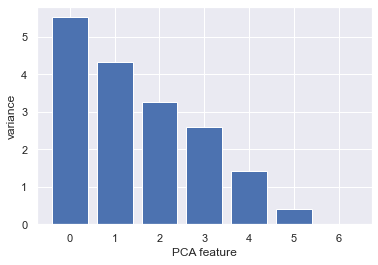

In [37]:
#plot the variance vs PCA features to visualize how our data is spread out
pipeline.fit_transform(new_df)
features=range(pca.n_components_)
features = features
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Clustering 

In [38]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(g_scores.iloc[:10000])
scaled_df = pd.DataFrame(scaled_data,columns=g_scores.columns)

In [39]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [40]:
hopkins(scaled_df)

0.8610975020250482

### 5. Modelling 

Collaborative based Method 

In [41]:
#Loading 10000 dataset
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(10000), Reader)

In [42]:
 #Implement an algorithm
algo = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), 
                  KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

#Read 10000 dataset
data2 = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(10000), Reader())

#Implementing algorithm for RMSE
algo_rmse=[]
for a in algo:
    
    cross_valid=cross_validate(a, data2, measures=['RMSE'], cv = 3)
    output=pd.DataFrame.from_dict(cross_valid).mean(axis=0)
    output=output.append(pd.Series([str(a).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    algo_rmse.append(output)

algo_rmse
surprise_results = pd.DataFrame(algo_rmse).set_index('Algorithm').sort_values('test_rmse')
surprise_results

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,1.045135,4.188325,0.132681
BaselineOnly,1.046594,0.132002,0.101001
SVD,1.046724,1.908335,0.568340
KNNBaseline,1.046984,4.385994,0.115338
KNNBasic,1.077026,4.335657,0.159678
KNNWithZScore,1.103423,5.256988,0.231335
KNNWithMeans,1.106143,4.859002,0.116996
SlopeOne,1.106474,1.056002,0.107997
NMF,1.110462,4.214000,0.110341


In [43]:
#Loading 100000 dataset
data4 = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(100000), Reader()) 

In [44]:
trainset, testset = train_test_split(data4, test_size=0.05)

In [45]:
from surprise import accuracy
#SVDpp model
svdpp=SVDpp(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

#Fitting the model
svdpp.fit(trainset)

# Making prediction on the validation dataset
test_pred= svdpp.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

RMSE: 0.9770


In [47]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test_df.itertuples(index=False):
    output=svdpp.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

,ID,est
0,1_2011,3.430908
1,1_4144,3.914498
2,1_5767,3.533758
3,1_6711,3.876866
4,1_7318,2.815108


In [48]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVDpp.csv", index=False)

Predicting with SVD algorithm

In [49]:
#Loading 1000000 dataset
data3 = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(1000000), Reader()) 

In [50]:
trainset, testset = train_test_split(data3, test_size=0.05)

In [51]:
from surprise import accuracy
#SVD model
svd=SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

#Fitting the model
svd.fit(trainset)

# Making prediction on the validation dataset
test_pred= svd.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

RMSE: 0.9001


In [ ]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test_df.itertuples(index=False):
    output=svd.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

In [ ]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVD.csv", index=False)

#### Predicting with BaselineOnly algorithm

In [46]:
#Loading 1100000 dataset
data5 = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(1100000), Reader()) 

In [47]:
trainset, testset = train_test_split(data5, test_size=0.05)

In [48]:
from surprise import accuracy
#BaselineOnly model
bsl_options = {'method': 'sgd','n_epochs': 40}
blo=BaselineOnly(bsl_options=bsl_options)

#Fitting the model
blo.fit(trainset)

# Making prediction on the validation dataset
test_pred= blo.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

Estimating biases using sgd...
RMSE: 0.8976


In [50]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test_df.itertuples(index=False):
    output=blo.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

,ID,est
0,1_2011,3.321342
1,1_4144,4.121742
2,1_5767,2.675648
3,1_6711,3.493221
4,1_7318,2.947493


In [51]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("blo.csv", index=False)

#### Predicting with Normal Predictor algorithm

In [ ]:
#Loading 1100000 dataset
data6 = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(1100000), Reader()) 

In [ ]:
trainset, testset = train_test_split(data6, test_size=0.05)

In [ ]:
np_test = NormalPredictor()
np_test.fit(trainset)
predictions = np_test.test(testset)
# Calculate RMSE
np_rmse = accuracy.rmse(predictions)

### 6. Performance Evaluation 

In [ ]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVD','NormalPredictor','BaselineOnly','NMF','SlopeOne','CoClustering']
rmse_y = [svd_rmse,np_rmse,blo_rmse,nmf_rmse,slo_rmse,cc_rmse]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='brg',edgecolor='black')
plt.title('RMSE Value Per Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

### 7. Hyperparameter tuning 

In [ ]:
param_grid = {'n_epochs':[40], #[30,40,50],
              'n_factors':[400], #[100,200,300,400],
              'init_std_dev':[0.005], #[0.001,0.005,0.05,0.1],
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1)
grid_SVD.fit(data3)
print('***Best score:***')
print(grid_SVD.best_score['rmse'])
print('***Best parameters:***')
print(grid_SVD.best_params['rmse'])

### 8. Conclusion 

### 9. Save Output